In [389]:
import pandas as pd
import numpy as np
from scipy.stats import f

import os
import sys
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm



Loại bỏ giá trị ngoại lai

In [390]:
def remove_outliers_iqr(df, col):
    """
    Loại bỏ ngoại lai theo phương pháp IQR cho một biến col
    """
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    df_clean = df[(df[col] >= lower) & (df[col] <= upper)].copy()

    print("----- LOẠI BỎ NGOẠI LAI -----")
    print(f"Biến: {VAR_LABELS.get(col, col)}")
    print(f"Ngưỡng dưới: {lower:.4f}")
    print(f"Ngưỡng trên: {upper:.4f}")
    print(f"Số quan sát ban đầu: {len(df)}")
    print(f"Số quan sát sau làm sạch: {len(df_clean)}")
    print(f"Số quan sát bị loại: {len(df) - len(df_clean)}\n")

    return df_clean

Đọc bộ dữ liệu

In [391]:
# Đọc dữ liệu
#df = pd.read_csv('Bộ dữ liệu con.csv', encoding='utf-8-sig') # Có biến giả
df = pd.read_csv('Bộ dữ liệu con(1).csv', encoding='utf-8-sig') # Không có biến giả
#df = pd.read_csv('chí.csv', encoding='utf-8-sig') # Không có biến giả



In [392]:
# ===================== BƯỚC 1. XÁC ĐỊNH MÔ HÌNH ======================
print("="*60)
print("BƯỚC 1. XÁC ĐỊNH MÔ HÌNH HỒI QUY")
print("Biến phụ thuộc: Sản lượng lúa (goutput)")
print("="*60, "\n")

BƯỚC 1. XÁC ĐỊNH MÔ HÌNH HỒI QUY
Biến phụ thuộc: Sản lượng lúa (goutput)



BƯỚC 1.5. KHAI BÁO BIẾN

In [393]:
# Có biến giả
"""VAR_LABELS = {
    "size": "Diện tích canh tác (ha)",
    "seed": "Lượng giống (kg)",
    "urea": "Phân urê (kg)",
    "phosphate": "Phân lân (kg)",
    "pesticide": "Thuốc BVTV",
    "hiredlabor": "Lao động thuê",
    "famlabor": "Lao động gia đình",
    "price": "Giá lúa",
    "goutput": "Sản lượng lúa"
}

BINARY_LABELS = {
    "status_o": "Chủ ruộng",
    "status_sh": "Thuê đất",
    "varieties_trad": "Giống truyền thống",
    "varieties_high": "Giống năng suất cao",
    "bimas_y": "Tham gia BIMAS",
    "bimas_no": "Không tham gia BIMAS"
}"""

# Không có biến giả
VAR_LABELS = {
    "size": "Diện tích canh tác (ha)",
    "seed": "Lượng giống sử dụng (kg)",
    "urea": "Lượng phân urê (kg)",
    "phosphate": "Lượng phân lân (kg)",
    "pesticide": "Chi phí thuốc BVTV",

    "pseed": "Giá giống",
    "purea": "Giá phân urê",
    "pphosph": "Giá phân lân",

    "hiredlabor": "Lao động thuê (công)",
    "famlabor": "Lao động gia đình (công)",
    "totlabor": "Tổng lao động (công)",
    "wage": "Tiền công lao động",

    "price": "Giá lúa",
    "goutput": "Sản lượng lúa"
}

BINARY_LABELS = {}

quantitative_vars = list(VAR_LABELS.keys())
binary_vars = list(BINARY_LABELS.keys())

Thống kê mô tả

In [394]:
print("="*60)
print("BƯỚC 2. THỐNG KÊ MÔ TẢ")
print("="*60, "\n")

print("----- BIẾN ĐỊNH LƯỢNG -----")
desc = df[quantitative_vars].describe()
desc = desc.rename(columns=VAR_LABELS)
print(desc, "\n")

print("----- BIẾN NHỊ PHÂN -----")
bin_summary = []
for var, label in BINARY_LABELS.items():
    n = df[var].count()
    count1 = df[var].sum()
    bin_summary.append({
        "Biến": label,
        "Số quan sát": n,
        "Số = 1": count1,
        "Tỷ lệ (%)": round(count1/n*100, 2)
    })

print(pd.DataFrame(bin_summary), "\n")

BƯỚC 2. THỐNG KÊ MÔ TẢ

----- BIẾN ĐỊNH LƯỢNG -----
       Diện tích canh tác (ha)  Lượng giống sử dụng (kg)  Lượng phân urê (kg)  \
count               198.000000                198.000000           198.000000   
mean                  0.223596                  8.686869            50.444444   
std                   0.178692                  6.602794            45.284711   
min                   0.014000                  1.000000             1.000000   
25%                   0.100000                  4.000000            20.000000   
50%                   0.156500                  6.000000            35.000000   
75%                   0.286750                 10.000000            70.000000   
max                   1.120000                 33.000000           270.000000   

       Lượng phân lân (kg)  Chi phí thuốc BVTV   Giá giống  Giá phân urê  \
count           198.000000          198.000000  198.000000    198.000000   
mean             27.308081           35.530303   95.790000     81.

Vẽ đồ thị 

BƯỚC 3. TRỰC QUAN HÓA



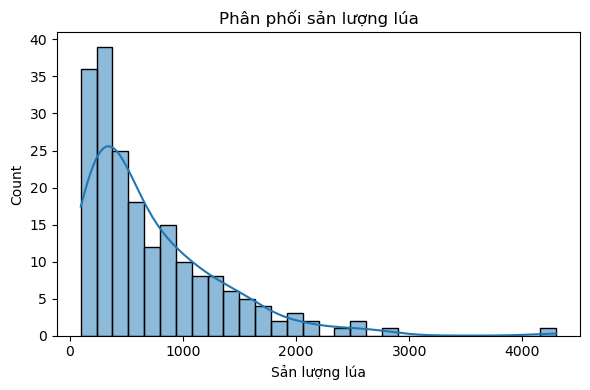

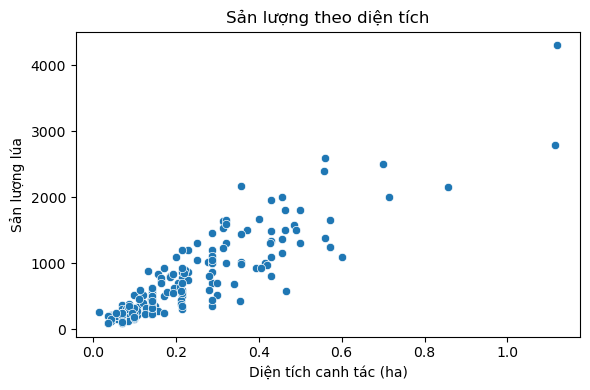

In [395]:
print("="*60)
print("BƯỚC 3. TRỰC QUAN HÓA")
print("="*60, "\n")

# Histogram sản lượng
plt.figure(figsize=(6,4))
sns.histplot(df["goutput"], bins=30, kde=True)
plt.xlabel(VAR_LABELS["goutput"])
plt.title("Phân phối sản lượng lúa")
plt.tight_layout()
plt.savefig("figures/hist_goutput.png")
plt.show()  
plt.close()

# Scatter: sản lượng ~ diện tích 
plt.figure(figsize=(6,4))
sns.scatterplot(x=df["size"], y=df["goutput"]) # sửa size là được
plt.xlabel(VAR_LABELS["size"])
plt.ylabel(VAR_LABELS["goutput"])
plt.title("Sản lượng theo diện tích")
plt.tight_layout()
plt.savefig("figures/scatter_goutput_size.png")
plt.show()  
plt.close()



In [396]:
# Loại bỏ ngoại lai cho biến sản lượng
df = remove_outliers_iqr(df, "goutput")

----- LOẠI BỎ NGOẠI LAI -----
Biến: Sản lượng lúa
Ngưỡng dưới: -825.0000
Ngưỡng trên: 2095.0000
Số quan sát ban đầu: 198
Số quan sát sau làm sạch: 191
Số quan sát bị loại: 7



OLS - phương pháp bình phương tối thiểu

In [397]:
print("="*60)
print("BƯỚC 5. KIỂM TRA ĐIỀU KIỆN TỒN TẠI NGHIỆM OLS")
print("="*60)

# ------------------------------------------------------------
# 5.1. Xây dựng ma trận thiết kế X
# ------------------------------------------------------------
X_vars = (
    [v for v in VAR_LABELS if v != "goutput"]
    + list(BINARY_LABELS.keys())
)
X_full = sm.add_constant(df[X_vars])

# ------------------------------------------------------------
# 5.2. Kiểm tra hạng và định thức X'X
# ------------------------------------------------------------
XtX = X_full.T @ X_full
det_xtx = np.linalg.det(XtX)
rank_X = np.linalg.matrix_rank(X_full)

print(f"Số biến (kể cả hằng số): {X_full.shape[1]}")
print(f"Hạng của ma trận X: {rank_X}")
print(f"det(X'X) = {det_xtx:.6e}")

if rank_X == X_full.shape[1] and det_xtx != 0:
    print("→ Ma trận X có hạng đầy đủ.")
    print("→ det(X'X) ≠ 0 ⇒ Nghiệm OLS tồn tại duy nhất.\n")
else:
    print("CẢNH BÁO:")
    print("→ Ma trận X không có hạng đầy đủ.")
    print("→ Có thể tồn tại đa cộng tuyến hoàn hảo.")
    print("→ Nghiệm OLS không tồn tại hoặc không duy nhất.\n")



BƯỚC 5. KIỂM TRA ĐIỀU KIỆN TỒN TẠI NGHIỆM OLS
Số biến (kể cả hằng số): 14
Hạng của ma trận X: 14
det(X'X) = 1.205922e+57
→ Ma trận X có hạng đầy đủ.
→ det(X'X) ≠ 0 ⇒ Nghiệm OLS tồn tại duy nhất.



Ước lượng mô hình

In [398]:
print("="*60)
print("BƯỚC 6. ƯỚC LƯỢNG MÔ HÌNH ĐẦY ĐỦ")
print("="*60, "\n")

y = df["goutput"]     # Biến phụ thuộc
model_full = sm.OLS(y, X_full).fit() #
print(model_full.summary(), "\n")

print("----- REGRESSION STATISTICS -----")

reg_stats = pd.DataFrame({
    "Statistic": [
        "Multiple R",
        "R Square",
        "Adjusted R Square",
        "Standard Error",
        "Observations"
    ],
    "Value": [
        np.sqrt(model_full.rsquared),
        model_full.rsquared,
        model_full.rsquared_adj,
        np.sqrt(model_full.scale),
        int(model_full.nobs)
    ]
})

# Hiển thị nhiều chữ số để tránh làm tròn quá sớm
print(reg_stats.round(8))
print()



print("----- ANOVA -----")

anova_table = pd.DataFrame({
    "Source": ["Regression", "Residual", "Total"],
    "df": [
        model_full.df_model,
        model_full.df_resid,
        model_full.df_model + model_full.df_resid
    ],
    "Sum of Squares": [
        model_full.ess, # SSR
        model_full.ssr, # SSE
        model_full.centered_tss # SST
    ],
    "F": [
        model_full.fvalue, 
        "",
        ""
    ],
    "Prob > F": [
        model_full.f_pvalue,
        "",
        ""
    ]
})

print(anova_table.round(6))
print()

print("----- COEFFICIENTS TABLE -----")

coef_table = model_full.summary2().tables[1].round(6)
print(coef_table)
print()

print("Ghi chú:")
print("- Các hệ số được kiểm định bằng kiểm định t riêng phần.")
print("- Kiểm định F đánh giá ý nghĩa thống kê tổng thể của mô hình.\n")



BƯỚC 6. ƯỚC LƯỢNG MÔ HÌNH ĐẦY ĐỦ

                            OLS Regression Results                            
Dep. Variable:                goutput   R-squared:                       0.834
Model:                            OLS   Adj. R-squared:                  0.821
Method:                 Least Squares   F-statistic:                     68.18
Date:                Tue, 30 Dec 2025   Prob (F-statistic):           9.83e-62
Time:                        22:10:05   Log-Likelihood:                -1273.7
No. Observations:                 191   AIC:                             2575.
Df Residuals:                     177   BIC:                             2621.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -364.3

Kiểm định và chọn biến

In [399]:
print("="*60)
print("BƯỚC 7. BACKWARD ELIMINATION")
print("="*60, "\n")

def backward_elimination_with_X(X, y, alpha=0.05):
    """
    Backward elimination trả về cả model và ma trận X mới
    """
    Xc = X.copy()
    removed_vars = []  # 🟢 Lưu biến đã loại
    remaining_vars = list(Xc.columns)  # 🟢 Lưu biến còn lại
    
    print("Quá trình backward elimination:")
    print("-" * 50)
    
    while True:
        model = sm.OLS(y, Xc).fit()
        pvals = model.pvalues.drop("const") if "const" in model.pvalues else model.pvalues
        
        if len(pvals) == 0:  # Chỉ còn constant
            break
            
        if pvals.max() > alpha:
            var = pvals.idxmax()
            removed_vars.append(var)
            
            print(f"Vòng {len(removed_vars)}: Loại '{VAR_LABELS.get(var, var)}'")
            print(f"  p-value = {pvals.max():.4f}")
            print(f"  Biến còn lại: {len(Xc.columns)-1}")
            
            Xc = Xc.drop(columns=[var])
            remaining_vars.remove(var)
        else:
            break
    
    # Fit model cuối
    final_model = sm.OLS(y, Xc).fit()
    
    print("-" * 50)
    print(f"Kết thúc: Loại {len(removed_vars)} biến")
    print(f"Còn lại {len(remaining_vars)} biến")
    
    # 🟢 TRẢ VỀ NHIỀU THỨ
    return {
        'model': final_model,          # Mô hình cuối
        'X_final': Xc,                 # Ma trận X cuối
        'removed_vars': removed_vars,  # Biến đã loại
        'final_vars': remaining_vars,  # Biến còn lại
        'final_formula': ' + '.join(remaining_vars)  # Công thức
    }

# Gọi hàm mới
results = backward_elimination_with_X(X_full, y)

# 🟢 Bây giờ bạn có TẤT CẢ:
#final_model = results['model']          # Model như cũ
model_final = results['model']
X_final = results['X_final']            # 🆕 MA TRẬN X MỚI
removed = results['removed_vars']       # 🆕 Biến đã loại
final_vars = results['final_vars']      # 🆕 Biến còn lại

print("\nKẾT QUẢ CHI TIẾT:")
print(f"1. Số biến đã loại: {len(removed)}")
print(f"2. Biến đã loại: {removed}")
print(f"3. Biến còn lại: {final_vars}")
print(f"4. Số cột trong X_final: {X_final.shape[1]}")

# ===================== BƯỚC 7.5. KIỂM ĐỊNH Ý NGHĨA SAU KHI CHỌN BIẾN ======================
print("="*60)
print("BƯỚC 7.5. KIỂM ĐỊNH Ý NGHĨA MÔ HÌNH CUỐI")
print("="*60, "\n")

print("----- REGRESSION STATISTICS (FINAL MODEL) -----")

reg_stats_final = pd.DataFrame({
    "Statistic": [
        "Multiple R",
        "R Square",
        "Adjusted R Square",
        "Standard Error",
        "Observations"
    ],
    "Value": [
        np.sqrt(model_final.rsquared),
        model_final.rsquared,
        model_final.rsquared_adj,
        np.sqrt(model_final.scale),
        int(model_final.nobs)
    ]
})

print(reg_stats_final.round(8))
print()



print("----- ANOVA (FINAL MODEL) -----")

anova_final = pd.DataFrame({
    "Source": ["Regression", "Residual", "Total"],
    "df": [
        model_final.df_model,
        model_final.df_resid,
        model_final.df_model + model_final.df_resid
    ],
    "Sum of Squares": [
        model_final.ess,          # SSR
        model_final.ssr,          # SSE
        model_final.centered_tss  # SST
    ],
    "F": [
        model_final.fvalue,
        "",
        ""
    ],
    "Prob > F": [
        model_final.f_pvalue,
        "",
        ""
    ]
})

print(anova_final.round(6))
print()


print("----- COEFFICIENTS (FINAL MODEL) -----")
print(model_final.summary2().tables[1].round(6))
print()

print("Ghi chú:")
print("- Các hệ số được kiểm định bằng kiểm định t riêng phần.")
print("- Kiểm định F đánh giá ý nghĩa thống kê tổng thể của mô hình.\n")

compare = pd.DataFrame({
    "Mô hình": ["Ban đầu", "Sau backward"],
    "Số biến": [X_full.shape[1]-1, X_final.shape[1]-1],
    "R²": [model_full.rsquared, model_final.rsquared],
    "Adj R²": [model_full.rsquared_adj, model_final.rsquared_adj]
})

print(compare.round(4))



BƯỚC 7. BACKWARD ELIMINATION

Quá trình backward elimination:
--------------------------------------------------
Vòng 1: Loại 'Lượng phân lân (kg)'
  p-value = 0.8980
  Biến còn lại: 13
Vòng 2: Loại 'Lao động thuê (công)'
  p-value = 0.6112
  Biến còn lại: 12
Vòng 3: Loại 'Giá giống'
  p-value = 0.5138
  Biến còn lại: 11
Vòng 4: Loại 'Giá phân lân'
  p-value = 0.4445
  Biến còn lại: 10
Vòng 5: Loại 'Lao động gia đình (công)'
  p-value = 0.4104
  Biến còn lại: 9
Vòng 6: Loại 'Chi phí thuốc BVTV'
  p-value = 0.4231
  Biến còn lại: 8
--------------------------------------------------
Kết thúc: Loại 6 biến
Còn lại 8 biến

KẾT QUẢ CHI TIẾT:
1. Số biến đã loại: 6
2. Biến đã loại: ['phosphate', 'hiredlabor', 'pseed', 'pphosph', 'famlabor', 'pesticide']
3. Biến còn lại: ['const', 'size', 'seed', 'urea', 'purea', 'totlabor', 'wage', 'price']
4. Số cột trong X_final: 8
BƯỚC 7.5. KIỂM ĐỊNH Ý NGHĨA MÔ HÌNH CUỐI

----- REGRESSION STATISTICS (FINAL MODEL) -----
           Statistic       Value
0    

Kiểm định ý nghĩa của hồi quy

In [400]:
print("----- KIỂM ĐỊNH F (Ý NGHĨA HỒI QUY TỔNG THỂ) -----")

print("\nGiả thuyết kiểm định:")
print("H₀: Tất cả các hệ số hồi quy riêng (trừ hằng số) đều bằng 0")
print("H₁: Tồn tại ít nhất một hệ số khác 0\n")

# Lấy các đại lượng từ model_final
SSR = model_final.ess                 # Sum of Squares Regression
SSE = model_final.ssr                 # Sum of Squares Error
SST = model_final.centered_tss        # Total Sum of Squares

R2  = model_final.rsquared
R2_adj = model_final.rsquared_adj

k = int(model_final.df_model)         # số biến độc lập (không tính const)
df_resid = int(model_final.df_resid)  # n - k - 1
n = int(model_final.nobs)             # số quan sát

F_stat = model_final.fvalue
p_value_F = model_final.f_pvalue
alpha = 0.05

# In kết quả
print(f"Số quan sát (n)                 = {n}")
print(f"Số biến độc lập (k)             = {k}")
print(f"Bậc tự do phần dư (n - k - 1)   = {df_resid}\n")

print(f"SSR (Sum of Squares Regression) = {SSR:.6f}")
print(f"SSE (Sum of Squares Error)      = {SSE:.6f}")
print(f"SST (Total Sum of Squares)      = {SST:.6f}\n")

print(f"R-squared                       = {R2:.6f}")
print(f"Adjusted R-squared              = {R2_adj:.6f}\n")

print(f"F-statistic = {F_stat:.4f}")
print(f"p-value     = {p_value_F:.6f}")

if p_value_F < alpha:
    print("→ Bác bỏ H₀: Mô hình hồi quy có ý nghĩa thống kê tổng thể.")
else:
    print("→ Không bác bỏ H₀: Mô hình không có ý nghĩa thống kê.")



----- KIỂM ĐỊNH F (Ý NGHĨA HỒI QUY TỔNG THỂ) -----

Giả thuyết kiểm định:
H₀: Tất cả các hệ số hồi quy riêng (trừ hằng số) đều bằng 0
H₁: Tồn tại ít nhất một hệ số khác 0

Số quan sát (n)                 = 191
Số biến độc lập (k)             = 7
Bậc tự do phần dư (n - k - 1)   = 183

SSR (Sum of Squares Regression) = 34609604.996360
SSE (Sum of Squares Error)      = 7033232.877986
SST (Total Sum of Squares)      = 41642837.874346

R-squared                       = 0.831106
Adjusted R-squared              = 0.824645

F-statistic = 128.6455
p-value     = 0.000000
→ Bác bỏ H₀: Mô hình hồi quy có ý nghĩa thống kê tổng thể.


Vẽ biểu đồ sau khi loại bỏ biến

Q–Q PLOT PHẦN DƯ (KIỂM ĐỊNH PHÂN PHỐI CHUẨN)

<Figure size 600x400 with 0 Axes>

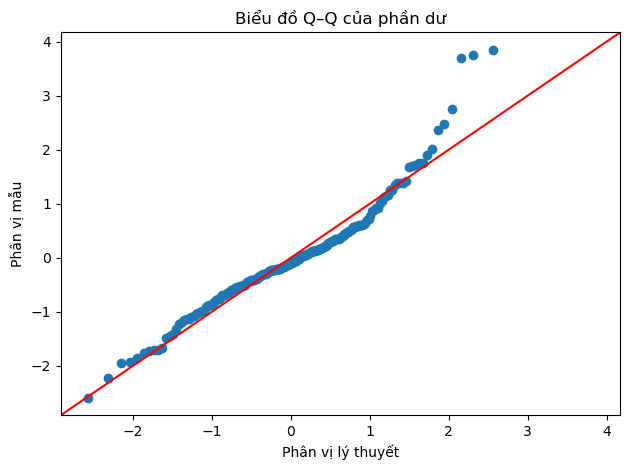

In [401]:
resid = model_final.resid
fitted = model_final.fittedvalues


# Thiết lập font để hiển thị tiếng Việt
plt.rcParams["font.family"] = "DejaVu Sans"

# Q-Q plot phần dư
plt.figure(figsize=(6, 4))
sm.qqplot(resid, line="45", fit=True)

# Đặt tên trục và tiêu đề bằng tiếng Việt
plt.xlabel("Phân vị lý thuyết")
plt.ylabel("Phân vị mẫu")
plt.title("Biểu đồ Q–Q của phần dư")

plt.tight_layout()
plt.savefig("figures/qqplot_residuals.png", dpi=300)
plt.show()
plt.close()


BOXPLOT PHẦN DƯ (PHÁT HIỆN OUTLIER)

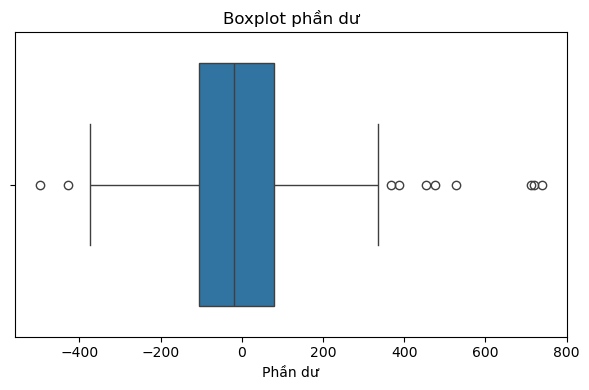

In [402]:
plt.figure(figsize=(6, 4))
sns.boxplot(x=resid)
plt.xlabel("Phần dư")
plt.title("Boxplot phần dư")
plt.tight_layout()
plt.savefig("figures/boxplot_residuals.png")
plt.show()
plt.close()


SCATTER PLOT: PHẦN DƯ – GIÁ TRỊ DỰ ĐOÁN

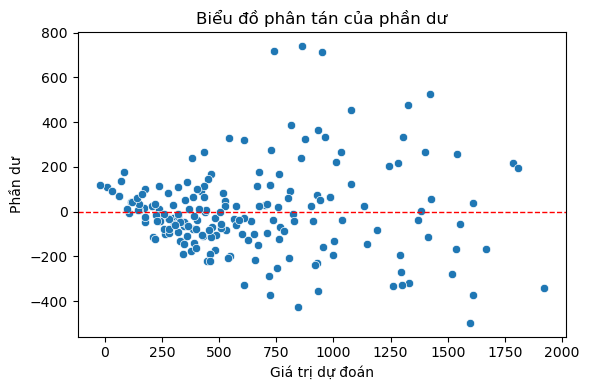

In [403]:
plt.figure(figsize=(6, 4))
sns.scatterplot(x=fitted, y=resid)
plt.axhline(0, color="red", linestyle="--", linewidth=1)
plt.xlabel("Giá trị dự đoán")
plt.ylabel("Phần dư")
plt.title("Biểu đồ phân tán của phần dư")
plt.tight_layout()
plt.savefig("figures/residuals_vs_fitted.png")
plt.show()
plt.close()


HISTOGRAM PHẦN DƯ (PHÂN PHỐI)

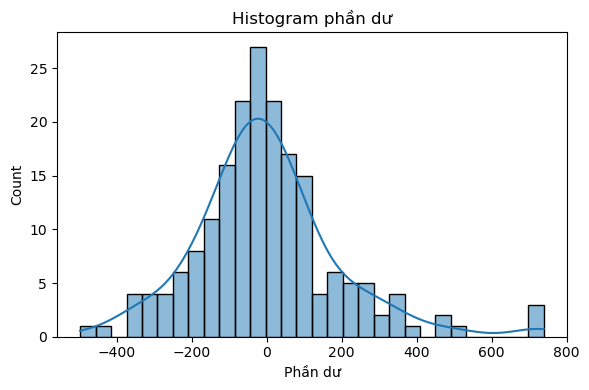

In [404]:
plt.figure(figsize=(6, 4))
sns.histplot(resid, bins=30, kde=True)
plt.xlabel("Phần dư")
plt.title("Histogram phần dư")
plt.tight_layout()
plt.savefig("figures/hist_residuals.png")
plt.show()
plt.close()


KIỂM ĐỊNH t – Ý NGHĨA HỆ SỐ HỒI QUY RIÊNG

In [405]:
print("----- KIỂM ĐỊNH t (Ý NGHĨA HỆ SỐ HỒI QUY RIÊNG) -----")

print("Giả thuyết kiểm định t:")
print("H₀: βᵢ = 0  (biến không ảnh hưởng đến sản lượng)")
print("H₁: βᵢ ≠ 0  (biến có ảnh hưởng đến sản lượng)\n")

# Lấy bảng hệ số từ mô hình CUỐI
coef_table_final = model_final.summary2().tables[1].round(6)
print(coef_table_final, "\n")

print("KẾT LUẬN KIỂM ĐỊNH t CHO TỪNG BIẾN:")

for var in coef_table_final.index:
    if var == "const":
        continue

    coef = coef_table_final.loc[var, "Coef."]
    pval = coef_table_final.loc[var, "P>|t|"]
    ci_low = coef_table_final.loc[var, "[0.025"]
    ci_high = coef_table_final.loc[var, "0.975]"]

    label = VAR_LABELS.get(var, var)

    print(f"- {label}:")
    print(f"  Hệ số chặn = {coef:.6f}")
    print(f"  p-value         = {pval:.6f}")
    print(f"  CI 95%          = [{ci_low:.6f}, {ci_high:.6f}]")

    if pval < alpha:
        print("  → Bác bỏ H₀: Hệ số có ý nghĩa thống kê.\n")
    else:
        print("  → Không bác bỏ H₀: Hệ số không có ý nghĩa thống kê.\n")




----- KIỂM ĐỊNH t (Ý NGHĨA HỆ SỐ HỒI QUY RIÊNG) -----
Giả thuyết kiểm định t:
H₀: βᵢ = 0  (biến không ảnh hưởng đến sản lượng)
H₁: βᵢ ≠ 0  (biến có ảnh hưởng đến sản lượng)

                Coef.    Std.Err.         t     P>|t|       [0.025  \
const     -409.700552  159.545048 -2.567930  0.011029  -724.484833   
size      1605.571179  206.804875  7.763701  0.000000  1197.542697   
seed        11.792171    4.292029  2.747458  0.006607     3.323947   
urea         1.876331    0.759172  2.471549  0.014367     0.378475   
purea        6.002629    2.406310  2.494536  0.013498     1.254949   
totlabor     0.394994    0.173224  2.280242  0.023747     0.053220   
wage         5.644314    1.196725  4.716467  0.000005     3.283162   
price       -5.169169    1.032562 -5.006161  0.000001    -7.206426   

               0.975]  
const      -94.916271  
size      2013.599662  
seed        20.260395  
urea         3.374186  
purea       10.750308  
totlabor     0.736768  
wage         8.005467  
pri

In [406]:
print("="*60)
print("PHƯƠNG TRÌNH HỒI QUY TUYẾN TÍNH CUỐI CÙNG")
print("="*60)

# Lấy hệ số ước lượng
params = model_final.params

equation = "Y = "

# Hằng số
equation += f"{params['const']:.4f}"

# Các biến giải thích
for var in params.index:
    if var == "const":
        continue

    coef = params[var]
    label = VAR_LABELS.get(var, var)

    if coef >= 0:
        equation += f" + {coef:.4f}·{label}"
    else:
        equation += f" - {abs(coef):.4f}·{label}"

equation += " + ε"

print(equation)
print("\nTrong đó:")
print("- Y: Sản lượng lúa (goutput)")
print("- ε: Sai số ngẫu nhiên")


PHƯƠNG TRÌNH HỒI QUY TUYẾN TÍNH CUỐI CÙNG
Y = -409.7006 + 1605.5712·Diện tích canh tác (ha) + 11.7922·Lượng giống sử dụng (kg) + 1.8763·Lượng phân urê (kg) + 6.0026·Giá phân urê + 0.3950·Tổng lao động (công) + 5.6443·Tiền công lao động - 5.1692·Giá lúa + ε

Trong đó:
- Y: Sản lượng lúa (goutput)
- ε: Sai số ngẫu nhiên
